In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

## Problem 1 ##

### a) ###

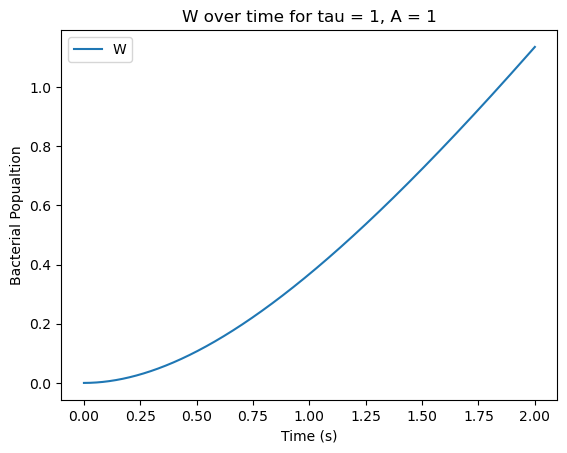

In [141]:
tau = 1
A = 1

def V(t, tau):
    return 1 - np.exp(-t / tau)


def W(t, tau, A):
    return A * (np.exp(-t / tau) - 1 + t / tau)


t_arr = np.linspace(0, 2, 1000)

plt.plot(t_arr, W(t_arr, tau, A))
plt.legend(['W'])
plt.xlabel('Time (s)')
plt.ylabel('Bacterial Population')
plt.title('W over time for tau = 1, A = 1')
plt.show()

### b) ###

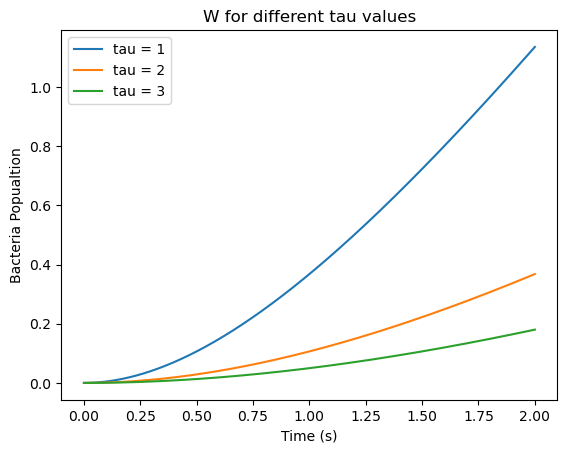

In [142]:
A = 1
for i in range(1,4):
    tau = i
    plt.plot(t_arr, W(t_arr, tau, A))
plt.legend(['tau = {}'.format(i) for i in range(1, 4)])
plt.title('W for different tau values')
plt.ylabel('Bacteria Population')
plt.xlabel('Time (s)')
plt.show()

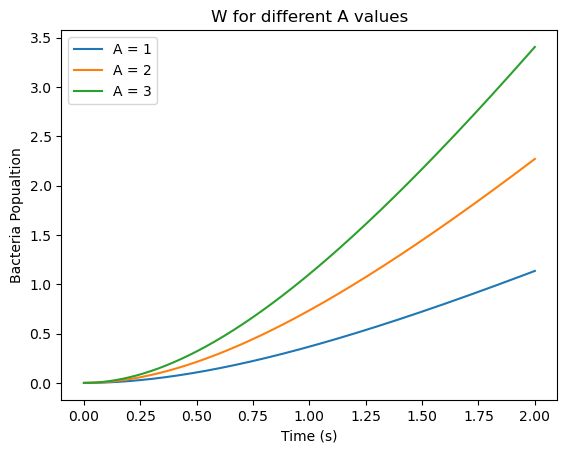

In [ ]:
tau = 1
for i in range(1,4):
    A = i
    plt.plot(t_arr, W(t_arr, tau, A))
plt.legend(['A = {}'.format(i) for i in range(1, 4)])
plt.title('W for different A values')
plt.ylabel('Bacteria Population')
plt.xlabel('Time (s)')
plt.show()

### c) ###

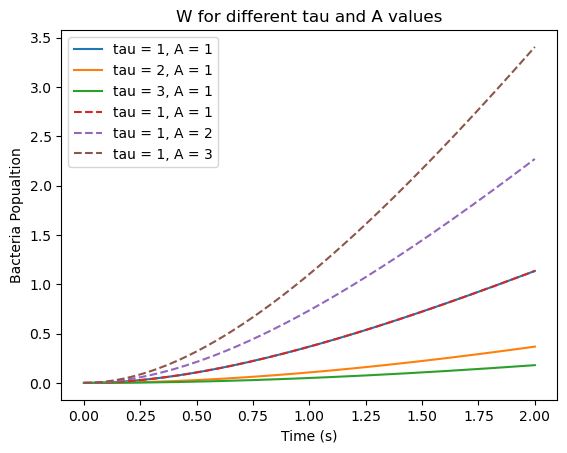

In [144]:
A = 1
for i in range(1, 4):
    tau = i
    plt.plot(t_arr, W(t_arr, tau, A))

tau = 1
for i in range(1, 4):
    A = i
    plt.plot(t_arr, W(t_arr, tau, A), linestyle='--')
plt.legend(['tau = {}, A = 1'.format(i) for i in range(1, 4)] + ['tau = 1, A = {}'.format(i) for i in range(1, 4)])
plt.title('W for different tau and A values')
plt.xlabel('Time (s)')
plt.ylabel('Bacteria Population')
plt.show()

### d) ###

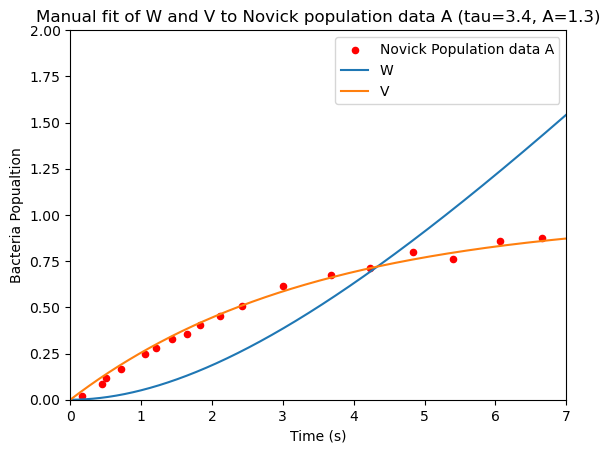

In [145]:
df = pd.read_csv('g149novickA.csv', header=None, names=['time', 'population'])

t_arr = np.linspace(0, 7, 5000)

tau = 3.4
A = 1.3

df.plot(x='time', y='population', kind='scatter', color='red')
plt.plot(t_arr, W(t_arr, tau, A), t_arr, V(t_arr, tau))
plt.legend(['Novick Population data A', 'W', 'V'])
plt.xlabel('Time (s)')
plt.title('Manual fit of W and V to Novick population data A (tau=3.4, A=1.3)')
plt.ylabel('Bacteria Population')
plt.xlim(0, 7)
plt.ylim(0, 2)
plt.show()

### e) ###

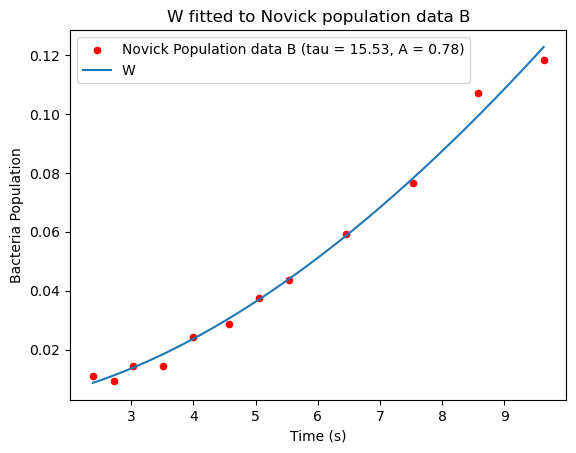

The fitted values are: tau = 15.53 +/- 8.43, A = 0.78 +/- 0.78


In [156]:
df = pd.read_csv('g149novickB.csv', header=None, names=['time', 'population'])

df = df[df['time'] < 10]

p, pcov = curve_fit(W, df['time'], df['population'], p0=[1, 1])
pstd = np.sqrt(np.diag(pcov))

t_arr = np.linspace(df['time'].min(), df['time'].max(), 5000)

df.plot(x='time', y='population', kind='scatter', color='red')
plt.plot(t_arr, W(t_arr, *p))
plt.legend(['Novick Population data B (tau = 15.53, A = 0.78)', 'W'])
plt.xlabel('Time (s)')
plt.title('W fitted to Novick population data B')
plt.ylabel('Bacteria Population')
plt.show()

print('The fitted values are: tau = {:.2f} +/- {:.2f}, A = {:.2f} +/- {:.2f}'.format(p[0], pstd[0], p[1], pstd[1]))

## Problem 2 ##

### a) ###

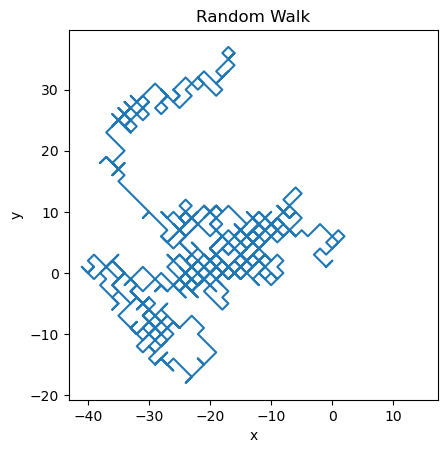

In [162]:
def walk(steps):
    '''
    Returns an array of values for a random walk of n steps (+/- 1)
    '''
    return np.cumsum(np.random.choice([-1, 1], steps))

n = 1000

x = walk(n)
y = walk(n)

plt.plot(x, y)
plt.axis('square')
plt.title('Random Walk')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### b) ###

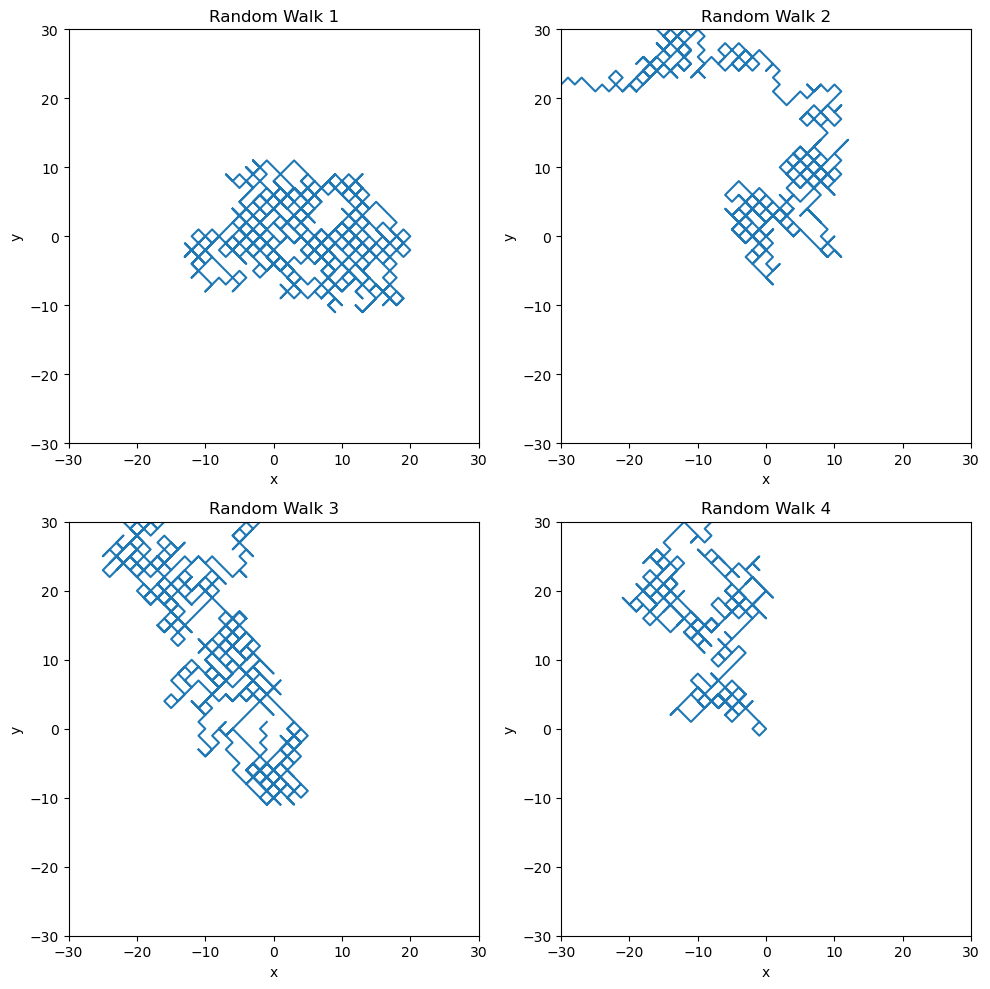

In [168]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for nax, ax in enumerate(axs.flatten(), start=1):
    x = walk(n)
    y = walk(n)
    ax.plot(x, y)
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    ax.set_title('Random Walk {}'.format(nax))
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()


### c) ###

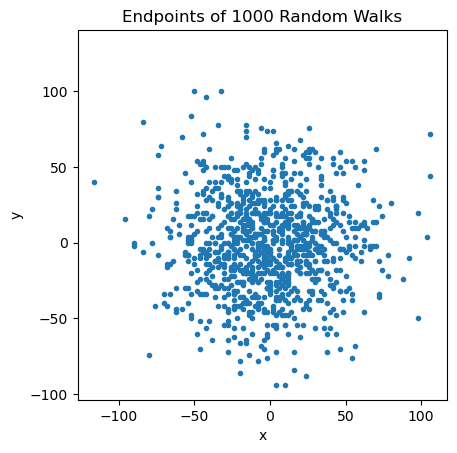

In [195]:
n = 1000
steps = 1000

endpoints_x = []
endpoints_y = []

for i in range(n):
    x = walk(steps)
    y = walk(steps)
    endpoints_x.append(x[-1])
    endpoints_y.append(y[-1])

plt.scatter(endpoints_x, endpoints_y, marker='.')
plt.title('Endpoints of 1000 Random Walks')
plt.axis('square')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### d) ###

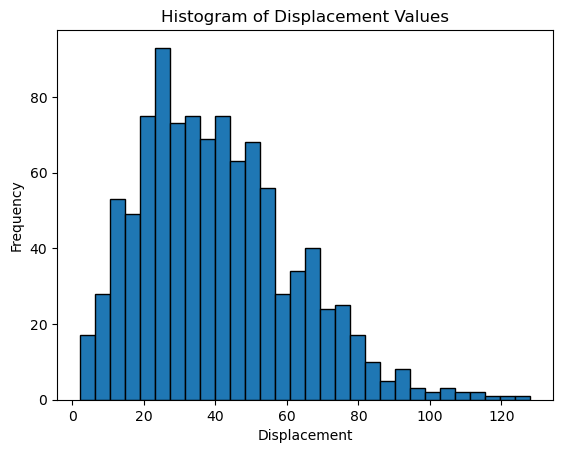

In [196]:
displacements = np.sqrt(np.array(endpoints_x)**2 + np.array(endpoints_y)**2)

plt.hist(displacements, bins=30, edgecolor='black')
plt.title('Histogram of Displacement Values')
plt.xlabel('Displacement')
plt.ylabel('Frequency')
plt.show()